#Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen y convierte a RGB

(4000, 3000, 3)


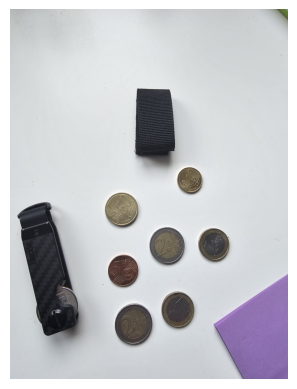

In [3]:
#Carga imagen ejemplo con monedas
img = cv2.imread('imagen_buena.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

(0.0, 256.0)

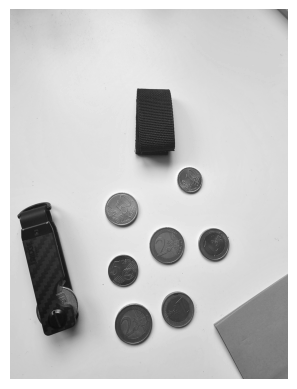

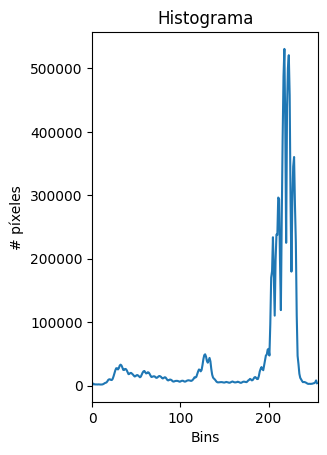

In [4]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

Cuenta elementos tras umbralizar

Text(0.5, 1.0, 'OTSU invertida')

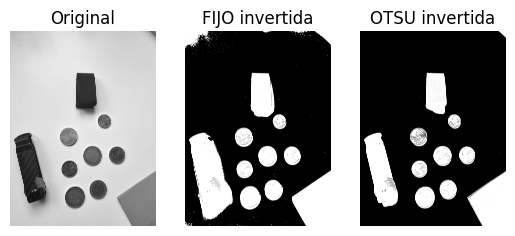

In [5]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 200
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')



Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


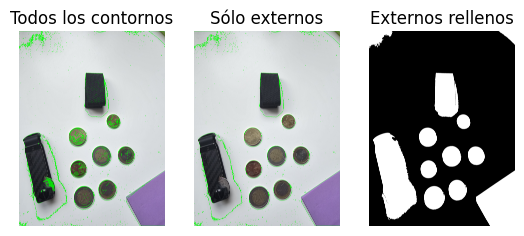

In [6]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    #Dimensión mínima (útil en ocasiones)
    if area > 40000 and area > 500:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


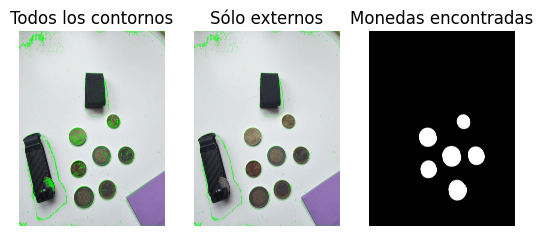

Monedas encontradas = 6


In [7]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

contador = 0
umbral_esfera = 5
umbral_minimo = 2
#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)
    
    #Dimensión mínima (útil en ocasiones)
    if area > 10:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        area = cv2.contourArea(c)
        perimetro = cv2.arcLength(c, True)
        relacion_area_perimetro = area / perimetro
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        #cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)
        
        if abs(relacion_area_perimetro - (4 * np.pi)) / (4 * np.pi) < umbral_esfera and abs(relacion_area_perimetro - (4 * np.pi)) / (4 * np.pi) > umbral_minimo:
            contador +=1 
            cv2.drawContours(img_cont, [c], -1, (255, 255, 255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Monedas encontradas')
plt.show()
print("Monedas encontradas = "  + str(contador))

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Monedas encontradas = 7


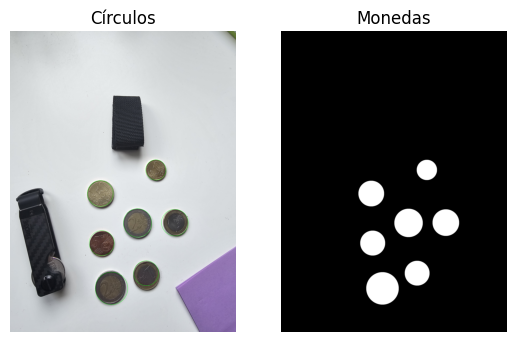

In [8]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=200, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=100,  # radio mínimo
        maxRadius=250,  # radio máximo
    )

contador = 0
#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 255, 0), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)
        contador += 1

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Monedas')
print("Monedas encontradas = " + str(contador))
plt.show()

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?




(3000, 4000, 3)
Moneda con valor 0.10 con area 100.9 en 1225.5, 1315.5
Moneda con valor 2 con area 130.5 en 1726.5, 1278.5
Moneda con valor 1 con area 113.4 en 1403.5, 927.5
Moneda con valor 0.5 con area 122.4 en 2379.5, 1091.5
Moneda con valor 0.5 con area 119.3 en 1858.5, 888.5
Moneda con valor 1 con area 119.1 en 1501.5, 1592.5
Moneda con valor 1 con area 114.9 en 2162.5, 596.5
Moneda con valor 0.10 con area 101.5 en 2617.5, 734.5
Moneda con valor 0.20 con area 111.9 en 2017.5, 1533.5
Moneda con valor 1 con area 113.5 en 2169.5, 1399.5
Moneda con valor 0.10 con area 93.5 en 2220.5, 887.5
Moneda con valor 1 con area 117.0 en 1881.5, 1630.5
Moneda con valor 1 con area 116.5 en 2500.5, 1647.5
Moneda con valor 0.10 con area 94.0 en 1672.5, 593.5
Monedas encontradas = 14


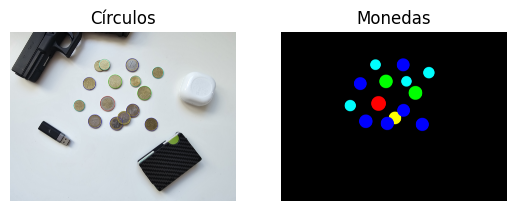

In [14]:
# Carga la imagen
img = cv2.imread('img_sol_2.jpg')
print(img.shape)

# Convierte la imagen a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Conversión a gris
gris = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 9)

# Localiza Círculos
circ = cv2.HoughCircles(
    pimg,  # imagen
    cv2.HOUGH_GRADIENT,  # tipo de detección
    1, 100,  # distancia mínima entre círculos
    param1=90,  # Valor del gradiente
    param2=65,  # Umbral acumulador
    minRadius=10,  # radio mínimo
    maxRadius=150,  # radio máximo
)

contador = 0
monedas = []

# Define una paleta de colores
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 255, 255)]

# Dibuja sobre la imagen de entrada y la imagen vacía
img_cont = np.zeros(img_rgb.shape, dtype=np.uint8)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for det in circ[0]:
    x_coor, y_coor, det_radio = det

    if det_radio >= 130:
        valor = "2"
        print("Moneda con valor "+ valor + " con area " + str(det_radio) + " en " + str(x_coor) + ", " + str(y_coor))
        color = colors[0]  # rojo
    elif det_radio >= 119.3:
        valor = "0.5"
        print("Moneda con valor "+ valor + " con area " + str(det_radio) + " en " + str(x_coor) + ", " + str(y_coor))
        color = colors[1]  # verde
    elif det_radio >= 113:
        valor = "1"
        print("Moneda con valor "+ valor + " con area " + str(det_radio) + " en " + str(x_coor) + ", " + str(y_coor))
        color = colors[2]  # azul
    elif det_radio >= 110:
        valor = "0.20"
        print("Moneda con valor "+ valor + " con area " + str(det_radio) + " en " + str(x_coor) + ", " + str(y_coor))
        color = colors[3]  # amarillo
    elif det_radio >= 90:
        valor = "0.10"
        print("Moneda con valor "+ valor + " con area " + str(det_radio) + " en " + str(x_coor) + ", " + str(y_coor))
        color = colors[4]  # azul celeste
    else:
        print("Moneda con valor "+ valor + " con area " + str(det_radio) + " en " + str(x_coor) + ", " + str(y_coor))
        valor = "Moneda no reconocida"
        color = colors[5]  # Asigna un color de la paleta


    cv2.circle(img_rgb, (int(x_coor), int(y_coor)),
               int(det_radio), color, 2)
    cv2.circle(img_cont, (int(x_coor), int(y_coor)),
               int(det_radio), color, -1)
    contador += 1

    monedas.append((x_coor, y_coor, valor))

# Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Círculos')


plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont)
plt.title('Monedas')
print("Monedas encontradas = " + str(contador))


plt.show()

Clasificación de microplásticos

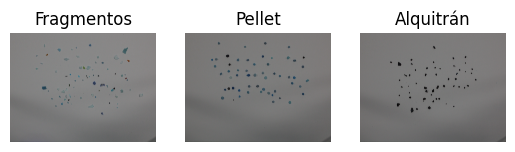

In [10]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán efectivamenet no es microplástico)
imgF = cv2.imread('fragment-03-olympus-10-01-2020.JPG') 
imgP = cv2.imread('pellet-03-olympus-10-01-2020.JPG') 
imgT = cv2.imread('tar-03-olympus-10-01-2020.JPG') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

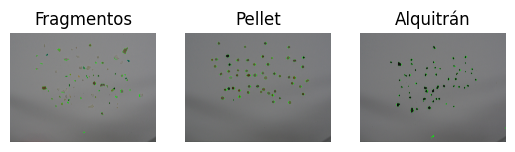

In [11]:
############### Fragmentos ###############
grayF = cv2.cvtColor(imgF, cv2.COLOR_BGR2GRAY)

umbral = 110
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1F = cv2.threshold(grayF,umbral,255,cv2.THRESH_BINARY_INV)

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1F, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada sólo contornos externos
contornos_fragmentos_filtradosF = [contour for contour in contornos2 if (cv2.contourArea(contour) >= 500 and cv2.contourArea(contour) <= 100000)]
img_rgbF = cv2.cvtColor(imgF, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgbF, contornos_fragmentos_filtradosF, -1, (0,255,0), 3)


############### Alquitran ###############
grayT = cv2.cvtColor(imgT, cv2.COLOR_BGR2GRAY)

umbralT = 100
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1T = cv2.threshold(grayT,umbralT,255,cv2.THRESH_BINARY_INV)

#Obtiene únicamente los contornos externos
contornos2T, hierarchy2 = cv2.findContours(img_th1T, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

#Dibuja sobre la imagen de entrada sólo contornos externos
contornos_fragmentos_filtradosT = [contourT for contourT in contornos2T if (cv2.contourArea(contourT) >= 500 and cv2.contourArea(contourT) <= 40000)]
img_rgbT = cv2.cvtColor(imgT, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgbT, contornos_fragmentos_filtradosT, -1, (0,255,0), 3)

############### Pellet ###############
grayP = cv2.cvtColor(imgP, cv2.COLOR_BGR2GRAY)

umbralP = 110
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1P = cv2.threshold(grayP,umbralP,255,cv2.THRESH_BINARY_INV)

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1P, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)
 
#Dibuja sobre la imagen de entrada sólo contornos externos
contornos_fragmentos_filtradosP = [contourP for contourP in contornos2 if (cv2.contourArea(contourP) >= 500 and cv2.contourArea(contourP) <= 500000)]
img_rgbP = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgbP, contornos_fragmentos_filtradosP, -1, (0,255,0), 3)


#### Areas ###
#Calcular areas fragmentos
areas_fragmentos = [cv2.contourArea(contour) for contour in contornos_fragmentos_filtradosF]


#Calcular areas fragmentos
areas_alquitran = [cv2.contourArea(contour) for contour in contornos_fragmentos_filtradosT]
#Calcular areas fragmentos
areas_pellet = [cv2.contourArea(contour) for contour in contornos_fragmentos_filtradosP]

#### Perimetros ###

# Calcular el perímetro de los contornos de Fragmentos
perimetros_fragmentos = [cv2.arcLength(contour, True) for contour in contornos_fragmentos_filtradosF]

# Calcular el perímetro de los contornos de Alquitrán
perimetros_alquitran = [cv2.arcLength(contour, True) for contour in contornos_fragmentos_filtradosT]

# Calcular el perímetro de los contornos de Pellet
perimetros_pellet = [cv2.arcLength(contour, True) for contour in contornos_fragmentos_filtradosP]

### Compacidad ###

# Calcular la compacidad de los contornos de Fragmentos
compacidad_fragmentos = [4 * np.pi * area / (perimetro ** 2) for area, perimetro in zip(areas_fragmentos, perimetros_fragmentos)]

# Calcular la compacidad de los contornos de Alquitrán
compacidad_alquitran = [4 * np.pi * area / (perimetro ** 2) for area, perimetro in zip(areas_alquitran, perimetros_alquitran)]

# Calcular la compacidad de los contornos de Pellet
compacidad_pellet = [4 * np.pi * area / (perimetro ** 2) for area, perimetro in zip(areas_pellet, perimetros_pellet)]


### Relacion area contenedor ###
#contenedor = imagen de las muestras
# Calcular el área de los contenedores (imágenes completas)
area_contenedor_F = imgF.shape[0] * imgF.shape[1]  # Área de la imagen de Fragmentos
area_contenedor_T = imgT.shape[0] * imgT.shape[1]  # Área de la imagen de Alquitrán
area_contenedor_P = imgP.shape[0] * imgP.shape[1]  # Área de la imagen de Pellet

# Calcular la relación de área para Fragmentos
relacion_area_fragmentos = [area / area_contenedor_F for area in areas_fragmentos]

# Calcular la relación de área para Alquitrán
relacion_area_alquitran = [area / area_contenedor_T for area in areas_alquitran]

# Calcular la relación de área para Pellet
relacion_area_pellet = [area / area_contenedor_P for area in areas_pellet]

############### Imagenes con contornos ###############
# Mostrar la imagen con los círculos detectados
plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgbF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgbP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(img_rgbT) 
plt.title('Alquitrán')
plt.show()

In [12]:
import math
    
def tar_classifier(list_contornos, imagen_gris):
    umbral_color_oscuro = 70
    contornos_oscuros = 0
     # Inicializa contadores
    contornos_identificados = 0
    umbral_relacion_aspecto = 0.9

    for contorno in list_contornos:
        contornos_identificados +=1
        # Calcula la relación de aspecto del contorno
        x, y, w, h = cv2.boundingRect(contorno)
        relacion_aspecto = float(w) / h

        # Calcula la compacidad del contorno
        perimetro = cv2.arcLength(contorno, True)
        area = cv2.contourArea(contorno)
        compacidad =  (4 * math.pi * area) / (perimetro ** 2)
        #print(compacidad)
        #print("Relación de aspecto = " + str(relacion_aspecto))
        
         # Comprueba si la relación de aspecto cumple con el umbral
        if (1 - umbral_relacion_aspecto <= relacion_aspecto <= 1 + umbral_relacion_aspecto) and compacidad <= 0.8:
            # Recorta la región del contorno en la imagen en escala de grises
            region_contorno = imagen_gris[y:y+h, x:x+w]

            # Calcula el valor promedio de la región
            promedio = np.mean(region_contorno)

            if promedio < umbral_color_oscuro:
                contornos_oscuros += 1

    return contornos_oscuros
    
def fragment_classifier(list_contornos, imagen_gris):
    umbral_color_oscuro = 70
    fragmentos = 0
     # Inicializa contadores
    contornos_identificados = 0
    umbral_relacion_aspecto = 0.9

    for contorno in list_contornos:
        contornos_identificados +=1
        # Calcula la relación de aspecto del contorno
        x, y, w, h = cv2.boundingRect(contorno)
        relacion_aspecto = float(w) / h
        #print("Relacion:", relacion_aspecto)
        # Calcula la compacidad del contorno
        perimetro = cv2.arcLength(contorno, True)
        area = cv2.contourArea(contorno)
        compacidad =  (4 * math.pi * area) / (perimetro ** 2)
        #print(compacidad)
        #print("Relación de aspecto = " + str(relacion_aspecto))
        #print(compacidad)
         # Comprueba si la relación de aspecto cumple con el umbral
        if (1 - umbral_relacion_aspecto <= relacion_aspecto <= 2 + umbral_relacion_aspecto) and compacidad < 0.6:
            # Recorta la región del contorno en la imagen en escala de grises
            region_contorno = imagen_gris[y:y+h, x:x+w]

            # Calcula el valor promedio de la región
            promedio = np.mean(region_contorno)

            if promedio > umbral_color_oscuro:
                fragmentos += 1

    return fragmentos

def pellet_classifier(list_contornos, imagen_gris):
    contornos_redondos = 0
    umbral_color_oscuro = 70
    # Define un umbral de relación de aspecto para considerar que un contorno es redondo
    umbral_relacion_aspecto = 0.2

    for contorno in list_contornos:
        # Calcula la relación de aspecto del contorno
        x, y, w, h = cv2.boundingRect(contorno)
        relacion_aspecto = float(w) / h
        # Calcula la compacidad del contorno
        perimetro = cv2.arcLength(contorno, True)
        area = cv2.contourArea(contorno)
        compacidad =  (4 * math.pi * area) / (perimetro ** 2)
        #print(compacidad)
        #print("Relación de aspecto = " + str(relacion_aspecto))
        #Comprueba si la relación de aspecto cumple con el umbral
        if (1 - umbral_relacion_aspecto <= relacion_aspecto <= 1 + umbral_relacion_aspecto) and compacidad > 0.6:
           # Recorta la región del contorno en la imagen en escala de grises
            region_contorno = imagen_gris[y:y+h, x:x+w]

            # Calcula el valor promedio de la región
            promedio = np.mean(region_contorno)

            if promedio > umbral_color_oscuro:
                contornos_redondos += 1


    return contornos_redondos
print("-----PELLET------")
resultados = pellet_classifier(contornos_fragmentos_filtradosF, grayF)
print("Número de contornos fragmentos:", resultados)
resultados = pellet_classifier(contornos_fragmentos_filtradosT, grayT)
print("Número de contornos tar:", resultados)
resultados = pellet_classifier(contornos_fragmentos_filtradosP, grayP)
print("Número de contornos pellet:", resultados)
print("-----TAR------")
resultados = tar_classifier(contornos_fragmentos_filtradosF, grayF)
print("Número de contornos fragmentos:", resultados)
resultados = tar_classifier(contornos_fragmentos_filtradosT, grayT)
print("Número de contornos tar:", resultados)
resultados = tar_classifier(contornos_fragmentos_filtradosP, grayP)
print("Número de contornos pellet:", resultados)
print("-----FRAGMENT------")
resultados = fragment_classifier(contornos_fragmentos_filtradosF, grayF)
print("Número de contornos fragmentos:", resultados)
resultados = fragment_classifier(contornos_fragmentos_filtradosT, grayT)
print("Número de contornos tar:", resultados)
resultados = fragment_classifier(contornos_fragmentos_filtradosP, grayP)
print("Número de contornos pellet:", resultados)

matriz = ["Fragmentos", [0, 0, 0]],["Pellet", [0, 0, 0]],["Tar", [0, 0, 0]]
matriz[0][1][0]= fragment_classifier(contornos_fragmentos_filtradosF, grayF)
matriz[0][1][1]= fragment_classifier(contornos_fragmentos_filtradosP, grayP)
matriz[0][1][2]= fragment_classifier(contornos_fragmentos_filtradosT, grayT)

matriz[1][1][0]= pellet_classifier(contornos_fragmentos_filtradosF, grayF)
matriz[1][1][1]= pellet_classifier(contornos_fragmentos_filtradosP, grayP)
matriz[1][1][2]= pellet_classifier(contornos_fragmentos_filtradosT, grayT)

matriz[2][1][0]= tar_classifier(contornos_fragmentos_filtradosF, grayF)
matriz[2][1][1]= tar_classifier(contornos_fragmentos_filtradosP, grayP)
matriz[2][1][2]= tar_classifier(contornos_fragmentos_filtradosT, grayT)

print("-----Matriz-----")
print("{:<15} {:<10} {:<10} {:<10}".format("Tipo", "Fragment", "Pellet", "Tar"))
for v in matriz:
    print("{:<15} {:<10} {:<10} {:<10}".format(v[0], v[1][0], v[1][1], v[1][2]))

-----PELLET------
Número de contornos fragmentos: 14
Número de contornos tar: 1
Número de contornos pellet: 39
-----TAR------
Número de contornos fragmentos: 2
Número de contornos tar: 47
Número de contornos pellet: 3
-----FRAGMENT------
Número de contornos fragmentos: 25
Número de contornos tar: 5
Número de contornos pellet: 10
-----Matriz-----
Tipo            Fragment   Pellet     Tar       
Fragmentos      25         10         5         
Pellet          14         39         1         
Tar             2          3          47        


Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

In [13]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]


accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Anotada", labelpad=20, fontdict=label_font)

ModuleNotFoundError: No module named 'seaborn'